In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import xesmf as xe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copy
import pandas as pd
import cmocean as cmo
from cartopy.util import add_cyclic_point
import seaborn as sns

In [2]:
# tarea = xr.open_dataset('/home/disk/atmos/vcooper/work/ref/' + 'cicefsdww3i.cice.h1.0086.nc').tarea
landfrac = xr.open_dataset('/home/disk/atmos/vcooper/work/ref/' + 'domain.lnd.fv1.9x2.5_gx1v6.090206.nc')

In [3]:
import scipy.io as sio

In [4]:
## load Amrhein data
path = '/home/disk/atmos/vcooper/work/p2c2/lgm/amrhein/'
fname = 'Amrhein_etal_2018_LGM_MODERN_T_SST_seasonal.mat'
mat_contents = sio.loadmat(path + fname)

lgm_sst = xr.DataArray(data= mat_contents['lgm_Ti_seas'],
                     dims=['lat','lon','month'],
                     coords = {'month': np.arange(12)+1,
                               'lat': mat_contents['lat'].squeeze(),
                               'lon': mat_contents['lon'].squeeze()},
                     name = 'sst')

mod_sst = xr.DataArray(data= mat_contents['mod_Ti_seas'],
                     dims=['lat','lon','month'],
                     coords = {'month': np.arange(12)+1,
                               'lat': mat_contents['lat'].squeeze(),
                               'lon': mat_contents['lon'].squeeze()},
                     name = 'sst')

fname = 'Amrhein_etal_2018_LGM_MODERN_area_heff_seasonal.mat'
mat_contents = sio.loadmat(path + fname)
lgm_sic = xr.DataArray(data= mat_contents['lgm_areai_seas'],
                     dims=['lat','lon','month'],
                     coords = {'month': np.arange(12)+1,
                               'lat': mat_contents['lat'].squeeze(),
                               'lon': mat_contents['lon'].squeeze()},
                     name = 'sic')

mod_sic = xr.DataArray(data= mat_contents['mod_areai_seas'],
                     dims=['lat','lon','month'],
                     coords = {'month': np.arange(12)+1,
                               'lat': mat_contents['lat'].squeeze(),
                               'lon': mat_contents['lon'].squeeze()},
                     name = 'sic')

lgm_Hi = xr.DataArray(data= mat_contents['lgm_heffi_seas'],
                     dims=['lat','lon','month'],
                     coords = {'month': np.arange(12)+1,
                               'lat': mat_contents['lat'].squeeze(),
                               'lon': mat_contents['lon'].squeeze()},
                     name = 'hi')

mod_Hi = xr.DataArray(data= mat_contents['mod_heffi_seas'],
                     dims=['lat','lon','month'],
                     coords = {'month': np.arange(12)+1,
                               'lat': mat_contents['lat'].squeeze(),
                               'lon': mat_contents['lon'].squeeze()},
                     name = 'hi')

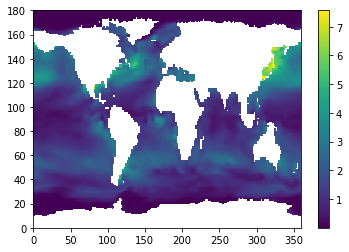

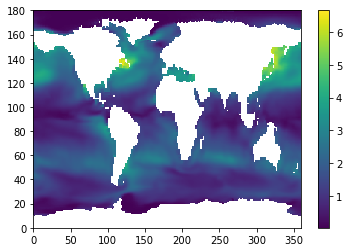

In [90]:
plt.pcolormesh(mat_contents['lgm_Ti_seas'].std(axis=2))
plt.colorbar()
plt.show()

plt.pcolormesh(mat_contents['mod_Ti_seas'].std(axis=2))
plt.colorbar()
plt.show()

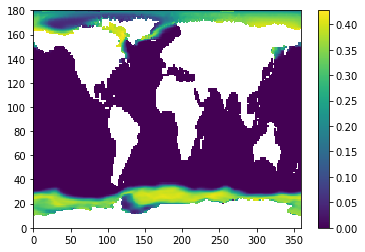

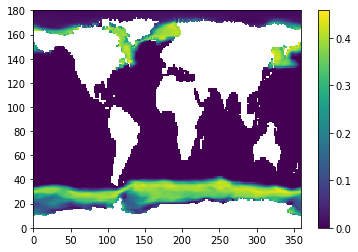

In [106]:
plt.pcolormesh(mat_contents['mod_areai_seas'].std(axis=2))
plt.colorbar()
plt.show()

plt.pcolormesh(mat_contents['lgm_areai_seas'].std(axis=2))
plt.colorbar()
plt.show()

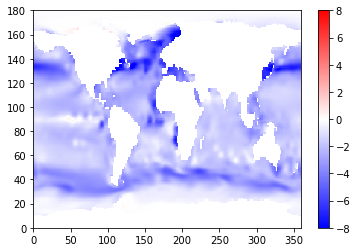

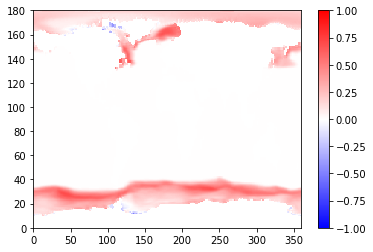

In [107]:
plt.pcolormesh(lgm_sst.mean(dim='month') - mod_sst.mean(dim='month'),cmap='bwr',vmin=-8,vmax=8)
plt.colorbar()
plt.show()

plt.pcolormesh(lgm_sic.mean(dim='month') - mod_sic.mean(dim='month'),cmap='bwr',vmin=-1,vmax=1)
plt.colorbar()
plt.show()

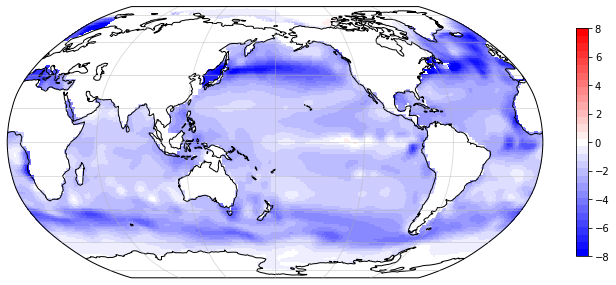

In [108]:
## checking the anomaly pattern before infill
nlevs = 8*4 ## must be even
vabs = 8
levs = np.delete(np.linspace(-vabs,vabs,nlevs+1),nlevs//2)
cmap=plt.cm.get_cmap('bwr', nlevs-1)

fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
                      subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
axtemp = ax
plt.sca(axtemp)

ds = (lgm_sst - mod_sst).mean(dim='month')
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

# plt.colorbar(shrink=0.6)
plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
axtemp.coastlines(color='k',zorder=1)
axtemp.gridlines(zorder=6,alpha=0.5)
# plt.title('lgm prediddle: Month ' + str(isel_m+1))
plt.show()

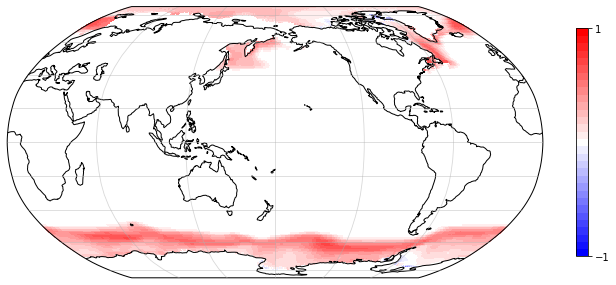

In [109]:
## checking the anomaly pattern before infill
nlevs = 8*4 ## must be even
vabs = 1
levs = np.delete(np.linspace(-vabs,vabs,nlevs+1),nlevs//2)
cmap=plt.cm.get_cmap('bwr', nlevs-1)

fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
                      subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
axtemp = ax
plt.sca(axtemp)

ds = (lgm_sic - mod_sic).mean(dim='month')
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

# plt.colorbar(shrink=0.6)
plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
axtemp.coastlines(color='k',zorder=1)
axtemp.gridlines(zorder=6,alpha=0.5)
# plt.title('lgm prediddle: Month ' + str(isel_m+1))
plt.show()

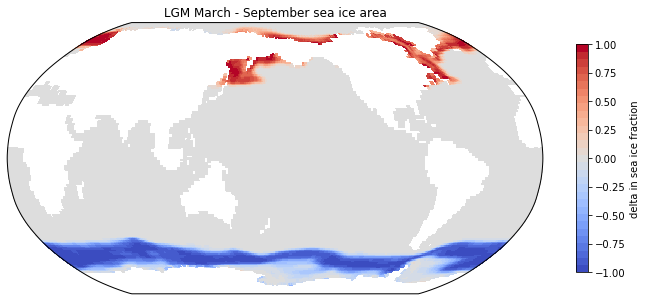

In [111]:
## checking the anomaly pattern before infill
nlevs = 8*4 ## must be even
vabs = 1
levs = np.delete(np.linspace(-vabs,vabs,nlevs+1),nlevs//2)
cmap=plt.cm.get_cmap('coolwarm', nlevs-1)

fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
                      subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
axtemp = ax
plt.sca(axtemp)

ds = lgm_sic.isel(month=2) - lgm_sic.isel(month=2+6)
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6,label = 'delta in sea ice fraction')
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
# axtemp.coastlines(color='k',zorder=1)
# axtemp.gridlines(zorder=6,alpha=0.5)
plt.title('LGM March - September sea ice area')
plt.show()

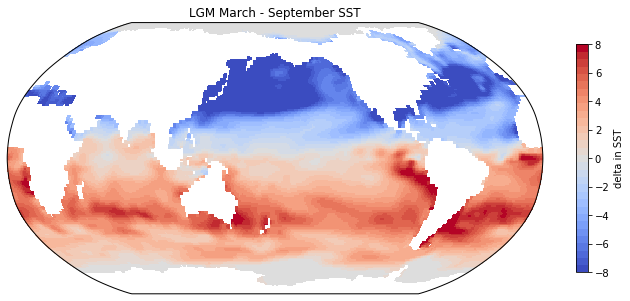

In [101]:
## checking the anomaly pattern before infill
nlevs = 8*4 ## must be even
vabs = 8
levs = np.delete(np.linspace(-vabs,vabs,nlevs+1),nlevs//2)
cmap=plt.cm.get_cmap('coolwarm', nlevs-1)

fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
                      subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
axtemp = ax
plt.sca(axtemp)

ds = lgm_sst.isel(month=2) - lgm_sst.isel(month=2+6)
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6,label = 'delta in SST')
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
# axtemp.coastlines(color='k',zorder=1)
# axtemp.gridlines(zorder=6,alpha=0.5)
plt.title('LGM March - September SST')
plt.show()

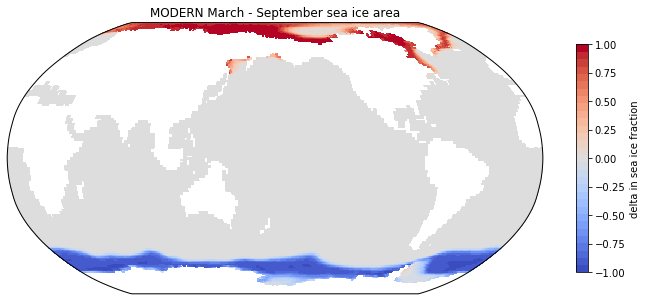

In [112]:
## checking the anomaly pattern before infill
nlevs = 8*4 ## must be even
vabs = 1
levs = np.delete(np.linspace(-vabs,vabs,nlevs+1),nlevs//2)
cmap=plt.cm.get_cmap('coolwarm', nlevs-1)

fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
                      subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
axtemp = ax
plt.sca(axtemp)

ds = mod_sic.isel(month=2) - mod_sic.isel(month=2+6)
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6,label = 'delta in sea ice fraction')
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
# axtemp.coastlines(color='k',zorder=1)
# axtemp.gridlines(zorder=6,alpha=0.5)
plt.title('MODERN March - September sea ice area')
plt.show()

## Troubleshooting the sea ice

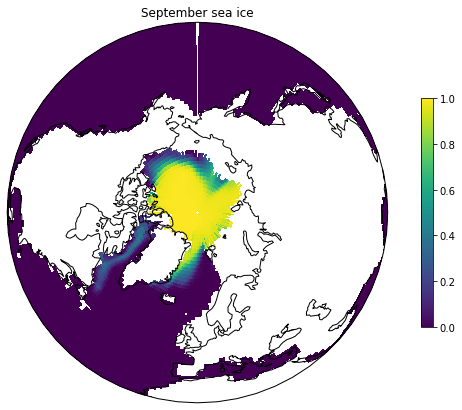

In [113]:
## checking the anomaly pattern before infill

# fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
#                       subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
                      subplot_kw={'projection':ccrs.NearsidePerspective(central_longitude=0,
                                                                        central_latitude=90)})
axtemp = ax
plt.sca(axtemp)

ds = lgm_sic.isel(month=2+6)# .std(dim='month')
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = 'viridis', vmin=0,vmax=1,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6)
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
axtemp.coastlines(color='k',zorder=1)
plt.title('September sea ice')
plt.show()

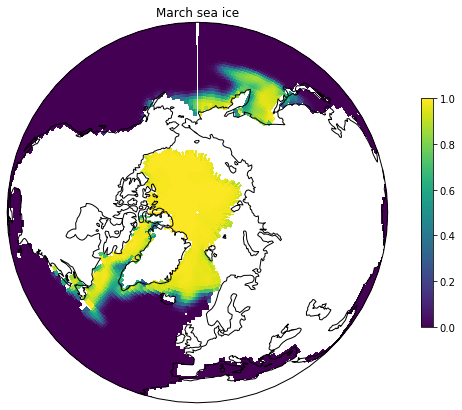

In [114]:
## checking the anomaly pattern before infill

# fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
#                       subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
                      subplot_kw={'projection':ccrs.NearsidePerspective(central_longitude=0,
                                                                        central_latitude=90)})
axtemp = ax
plt.sca(axtemp)

ds = lgm_sic.isel(month=2)# .std(dim='month')
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = 'viridis', vmin=0,vmax=1,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6)
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
axtemp.coastlines(color='k',zorder=1)
plt.title('March sea ice')
plt.show()

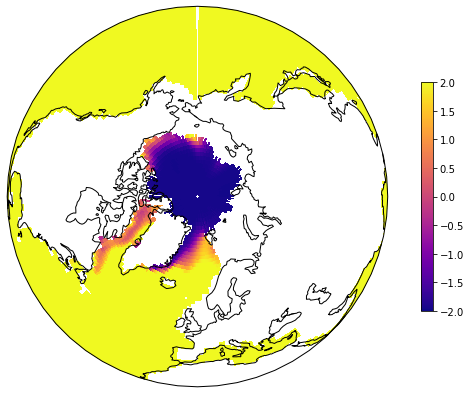

In [75]:
## checking the anomaly pattern before infill

# fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
#                       subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
                      subplot_kw={'projection':ccrs.NearsidePerspective(central_longitude=0,
                                                                        central_latitude=90)})
axtemp = ax
plt.sca(axtemp)

ds = lgm_sst.isel(month=2+6)# .std(dim='month')
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = 'plasma', vmin=-2,vmax=2,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6)
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
axtemp.coastlines(color='k',zorder=1)
# plt.title('lgm prediddle: Month ' + str(isel_m+1))
plt.show()

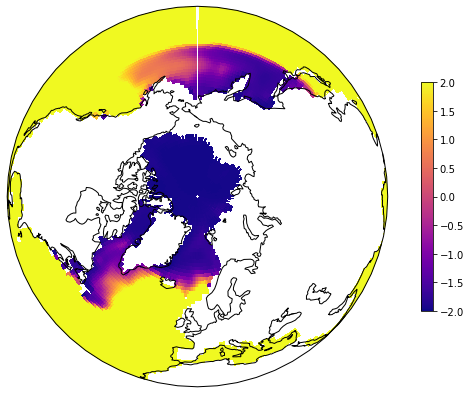

In [74]:
## checking the anomaly pattern before infill

# fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
#                       subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
                      subplot_kw={'projection':ccrs.NearsidePerspective(central_longitude=0,
                                                                        central_latitude=90)})
axtemp = ax
plt.sca(axtemp)

ds = lgm_sst.isel(month=2)# .std(dim='month')
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = 'plasma', vmin=-2,vmax=2,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6)
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
axtemp.coastlines(color='k',zorder=1)
# plt.title('lgm prediddle: Month ' + str(isel_m+1))
plt.show()

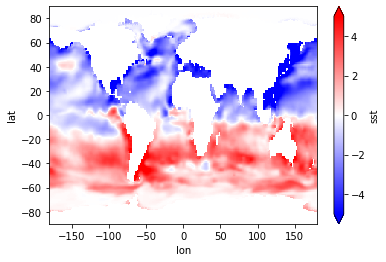

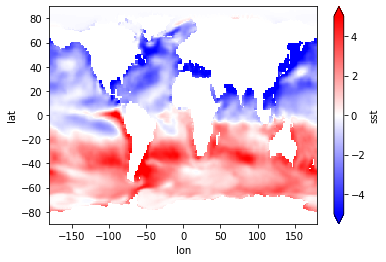

In [59]:
(lgm_sst[:,:,0] - lgm_sst[:,:,5]).plot(vmin=-5,vmax=5,cmap='bwr')
plt.show()

(mod_sst[:,:,0] - mod_sst[:,:,5]).plot(vmin=-5,vmax=5,cmap='bwr')
plt.show()

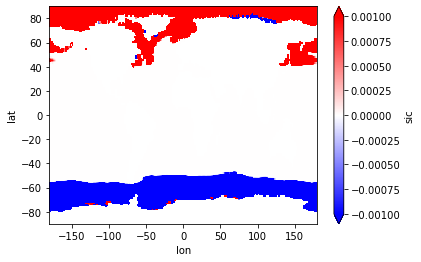

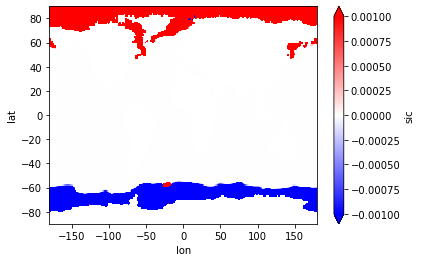

In [115]:
(lgm_sic[:,:,0] - lgm_sic[:,:,5]).plot(vmin=-0.001,vmax=0.001,cmap='bwr')
plt.show()

(mod_sic[:,:,0] - mod_sic[:,:,5]).plot(vmin=-0.001,vmax=0.001,cmap='bwr')
plt.show()

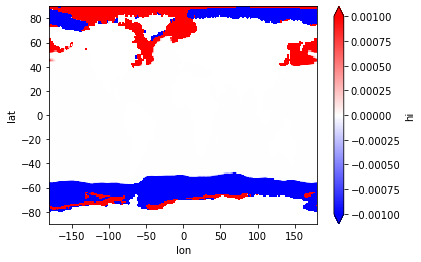

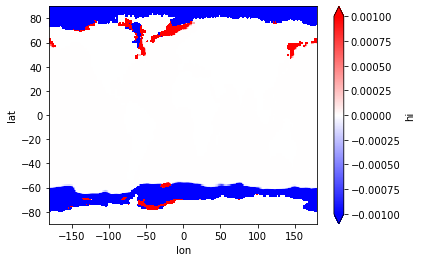

In [116]:
(lgm_Hi[:,:,0] - lgm_Hi[:,:,5]).plot(vmin=-0.001,vmax=0.001,cmap='bwr')
plt.show()

(mod_Hi[:,:,0] - mod_Hi[:,:,5]).plot(vmin=-0.001,vmax=0.001,cmap='bwr')
plt.show()

## save the netcdf files

In [117]:
lgm_sst = lgm_sst.transpose('month',...)
lgm_sic = lgm_sic.transpose('month',...)
mod_sst = mod_sst.transpose('month',...)
mod_sic = mod_sic.transpose('month',...)

In [118]:
lgm_ds = xr.merge([lgm_sst,lgm_sic])
mod_ds = xr.merge([mod_sst,mod_sic])

In [119]:
savepath = path
print(savepath)

/home/disk/atmos/vcooper/work/p2c2/lgm/amrhein/


In [120]:
path =  '/home/disk/atmos/vcooper/work/p2c2/lgm/amrhein/'

fname = 'Amrhein18_lgm.nc'
lgm_ds.to_netcdf(path + fname)

fname = 'Amrhein18_mod.nc'
mod_ds.to_netcdf(path + fname)

# POST INFILLING, POST HURRELL COMPARISON

In [22]:
savepath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
##MONTHLY
fname = 'amrhein_bc_final_prediddle.nc'
amrhein_bc_final_prediddle = xr.open_dataset(savepath + fname)

## LGMR for comparison
fname = 'LGMRlgm_bc_final_prediddle.nc'
LGMR_bc_final_prediddle = xr.open_dataset(savepath + fname)

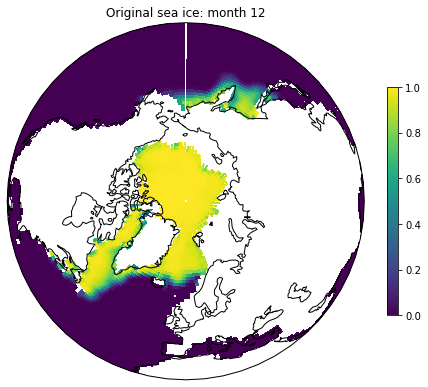

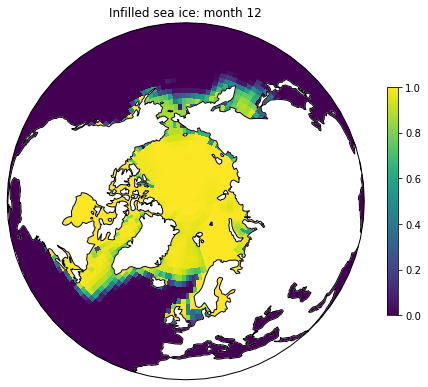

In [17]:
## checking the anomaly pattern before infill

# fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
#                       subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig,ax = plt.subplots(1,1,figsize=(8,7), dpi=72, 
                      subplot_kw={'projection':ccrs.NearsidePerspective(central_longitude=0,
                                                                        central_latitude=90)})
axtemp = ax
plt.sca(axtemp)

misel = 12-1
ds = lgm_sic.isel(month=misel)# .std(dim='month')
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = 'viridis', vmin=0,vmax=1,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6)
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
axtemp.coastlines(color='k',zorder=1)
plt.title('Original sea ice: month ' + str(misel+1))

## infilled
fig,ax = plt.subplots(1,1,figsize=(8,7), dpi=72, 
                      subplot_kw={'projection':ccrs.NearsidePerspective(central_longitude=0,
                                                                        central_latitude=90)})
axtemp = ax
plt.sca(axtemp)

ds = amrhein_bc_final_prediddle.ice_cov.isel(time=misel)# .std(dim='month')
## add cyclic point
lon_idx = ds.dims.index('lon')
lon = ds.coords['lon']
wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(wrap_lon, ds.lat, wrap_ds,
            cmap = 'viridis', vmin=0,vmax=1,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6)
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
axtemp.add_feature(cfeature.LAND,alpha=1,color='w',zorder=1)
axtemp.coastlines(color='k',zorder=1)
plt.title('Infilled sea ice: month ' + str(misel+1))

plt.show()

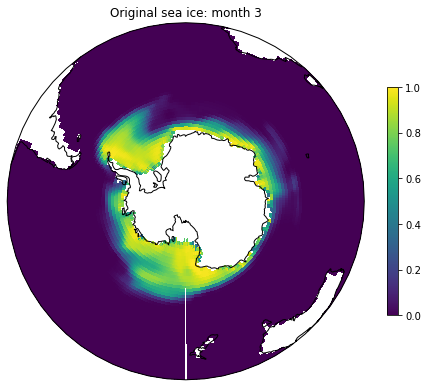

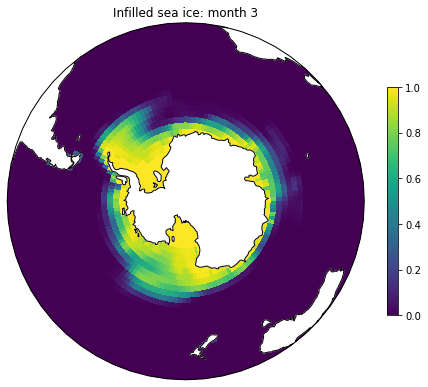

In [20]:
## checking the anomaly pattern before infill

# fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
#                       subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig,ax = plt.subplots(1,1,figsize=(8,7), dpi=72, 
                      subplot_kw={'projection':ccrs.NearsidePerspective(central_longitude=0,
                                                                        central_latitude=-90)})
axtemp = ax
plt.sca(axtemp)

misel = 3-1
ds = lgm_sic.isel(month=misel)# .std(dim='month')
## add cyclic point
# lon_idx = ds.dims.index('lon')
# lon = ds.coords['lon']
# wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(ds.lon, ds.lat, ds,
            cmap = 'viridis', vmin=0,vmax=1,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6)
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
# axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
axtemp.coastlines(color='k',zorder=1)
plt.title('Original sea ice: month ' + str(misel+1))

## infilled
fig,ax = plt.subplots(1,1,figsize=(8,7), dpi=72, 
                      subplot_kw={'projection':ccrs.NearsidePerspective(central_longitude=0,
                                                                        central_latitude=-90)})
axtemp = ax
plt.sca(axtemp)

ds = amrhein_bc_final_prediddle.ice_cov.isel(time=misel)# .std(dim='month')
## add cyclic point
lon_idx = ds.dims.index('lon')
lon = ds.coords['lon']
wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(wrap_lon, ds.lat, wrap_ds,
            cmap = 'viridis', vmin=0,vmax=1,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6)
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
axtemp.add_feature(cfeature.LAND,alpha=1,color='w',zorder=1)
axtemp.coastlines(color='k',zorder=1)
plt.title('Infilled sea ice: month ' + str(misel+1))

plt.show()

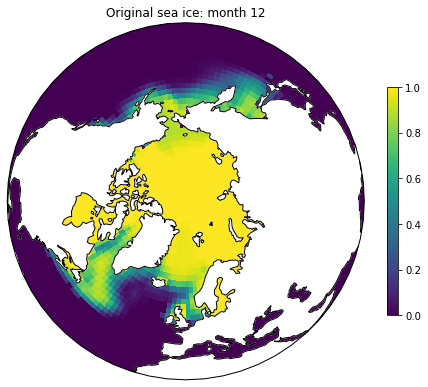

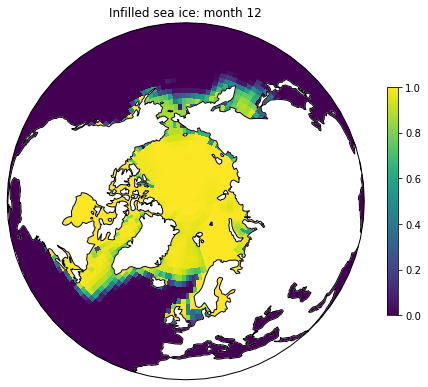

In [28]:
## LGMR comparison
## checking the anomaly pattern before infill

# fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72, 
#                       subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig,ax = plt.subplots(1,1,figsize=(8,7), dpi=72, 
                      subplot_kw={'projection':ccrs.NearsidePerspective(central_longitude=0,
                                                                        central_latitude=90)})
axtemp = ax
plt.sca(axtemp)

misel = 12-1
ds = LGMR_bc_final_prediddle.ice_cov.isel(time=misel)# .std(dim='month')
# add cyclic point
lon_idx = ds.dims.index('lon')
lon = ds.coords['lon']
wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(wrap_lon, ds.lat, wrap_ds,
            cmap = 'viridis', vmin=0,vmax=1,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6)
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
axtemp.add_feature(cfeature.LAND,alpha=1,color='w',zorder=1)
axtemp.coastlines(color='k',zorder=1)
plt.title('Original sea ice: month ' + str(misel+1))

## infilled
fig,ax = plt.subplots(1,1,figsize=(8,7), dpi=72, 
                      subplot_kw={'projection':ccrs.NearsidePerspective(central_longitude=0,
                                                                        central_latitude=90)})
axtemp = ax
plt.sca(axtemp)

ds = amrhein_bc_final_prediddle.ice_cov.isel(time=misel)# .std(dim='month')
## add cyclic point
lon_idx = ds.dims.index('lon')
lon = ds.coords['lon']
wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

# plt.pcolormesh(ds.lon, ds.lat, ds,
#             cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#             transform=ccrs.PlateCarree())
plt.pcolormesh(wrap_lon, ds.lat, wrap_ds,
            cmap = 'viridis', vmin=0,vmax=1,#levels=levs, extend='min',
            transform=ccrs.PlateCarree())

plt.colorbar(shrink=0.6)
# plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,2))
axtemp.add_feature(cfeature.LAND,alpha=1,color='w',zorder=1)
axtemp.coastlines(color='k',zorder=1)
plt.title('Infilled sea ice: month ' + str(misel+1))

plt.show()